In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [2]:
data = pd.read_csv("../data/dataset-full_hand-60s.csv")

In [3]:
data.head()

Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0         38        269        111         47        101         35   
1         39        356        120         62        146         39   
2         35        434        128         72        185         37   
3         32        476        137         74        205         39   
4         33        490        140         79        217         38   

   Channel_7  Channel_8     Palm_x     Palm_y  ...  Pinky_MCP_z  Pinky_PIP_x  \
0         22         23 -13.892977 -24.676735  ...   127.042839   113.481201   
1         24         25 -13.852209 -24.586508  ...   127.192207   113.670609   
2         25         25 -13.813737 -24.502161  ...   127.295685   113.810234   
3         24         27 -13.736932 -24.342701  ...   127.465889   114.056679   
4         25         27 -13.693318 -24.266806  ...   127.565887   114.191597   

   Pinky_PIP_y  Pinky_PIP_z  Pinky_DIP_x  Pinky_DIP_y  Pinky_DIP_z  \
0   131.047806   137.758286   128.349930   116.208405   119.820808   
1   131.218033   137.775970   128.412369   116.329781   120.034424   
2   131.367523   137.758301   128.447525   116.435005   120.223473   
3   131.638794   137.674881   128.473282   116.613785   120.565979   
4   131.785568   137.642868   128.489487   116.704178   120.750320   

   Pinky_TIP_x  Pinky_TIP_y  Pinky_TIP_z  
0   124.822617   118.878288   108.890717  
1   124.847496   118.893349   108.933693  
2   124.852211   118.890427   108.961174  
3   124.868614   118.919731   109.070923  
4   124.913513   118.978653   109.172569  

[5 rows x 74 columns]

<AxesSubplot:>

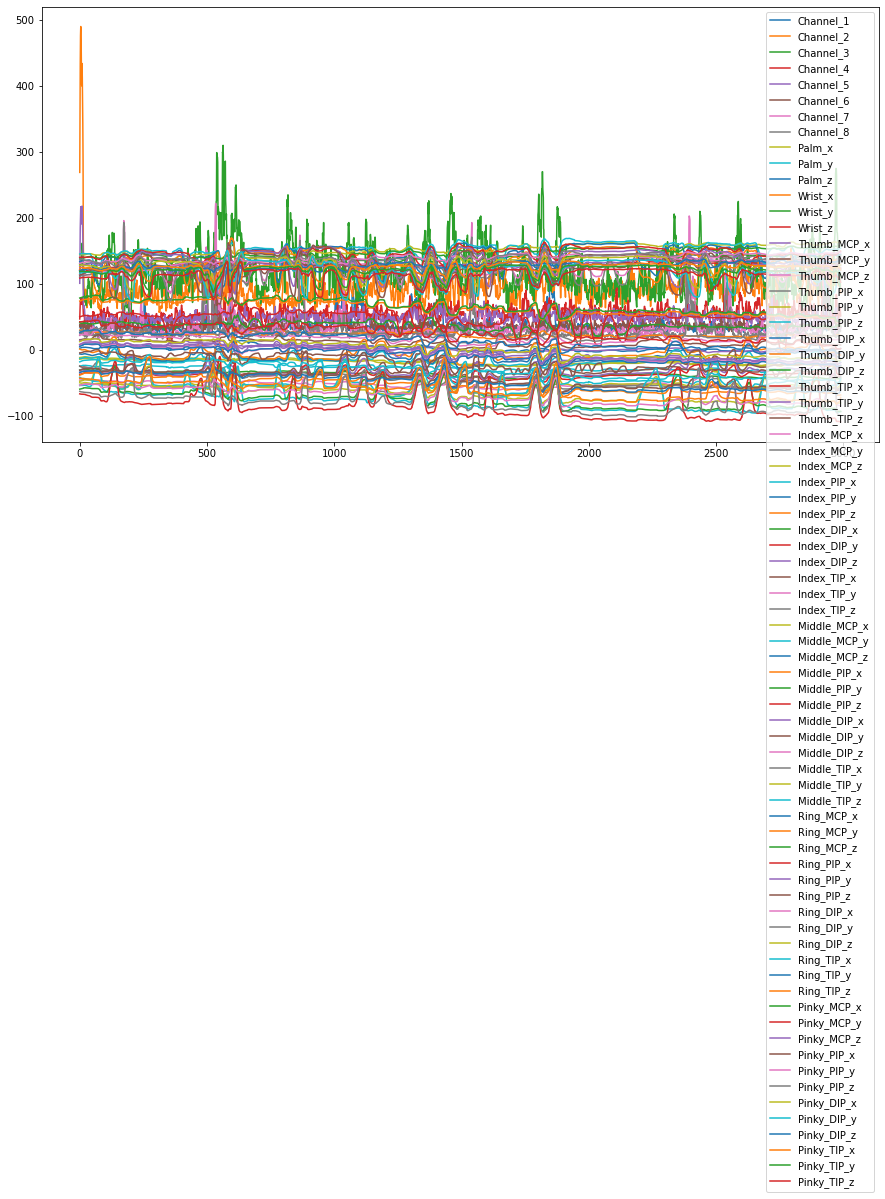

In [4]:
data.plot(figsize=(15, 8))

<AxesSubplot:>

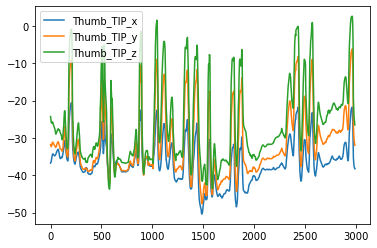

In [5]:
# Just considering the thumb
cols = ['Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z']
df = data[cols]
df.plot()

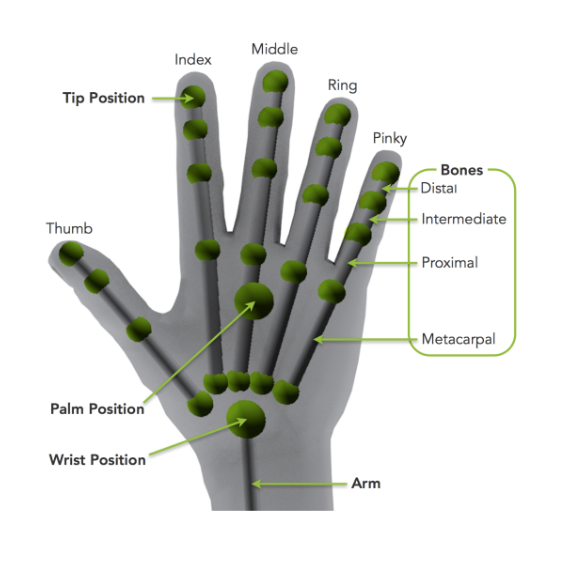

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

In [6]:
pd.set_option('display.max_rows', 75)
data.var()

Channel_1        164.279650
Channel_2        739.696395
Channel_3       1425.983184
Channel_4         88.249472
Channel_5        134.795655
Channel_6         34.431393
Channel_7        593.398561
Channel_8        355.029105
Palm_x            12.528525
Palm_y            13.184934
Palm_z            12.241530
Wrist_x           12.269769
Wrist_y           38.049922
Wrist_z          161.794857
Thumb_MCP_x       14.557710
Thumb_MCP_y       22.427925
Thumb_MCP_z       28.363815
Thumb_PIP_x       28.757419
Thumb_PIP_y       15.333879
Thumb_PIP_z       33.269765
Thumb_DIP_x       72.510807
Thumb_DIP_y       96.687622
Thumb_DIP_z       15.506009
Thumb_TIP_x       29.732333
Thumb_TIP_y       76.065555
Thumb_TIP_z      114.759192
Index_MCP_x       15.930769
Index_MCP_y       33.878186
Index_MCP_z       77.450259
Index_PIP_x      139.568699
Index_PIP_y      102.300191
Index_PIP_z      102.865228
Index_DIP_x      108.510884
Index_DIP_y      119.048897
Index_DIP_z      131.818529
Index_TIP_x      141

In [7]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [8]:
66 - 3

63

In [9]:
data.shape

(2990, 74)

## Plotting an example point. 

In [10]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [11]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

<IPython.core.display.Javascript object>


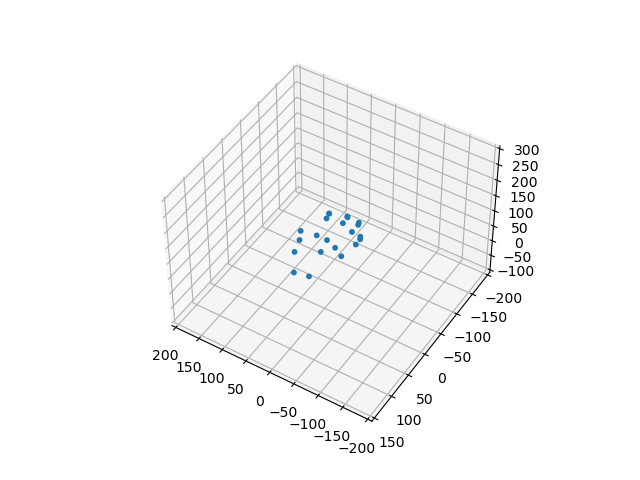

In [12]:
%matplotlib notebook

def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [13]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

<IPython.core.display.Javascript object>


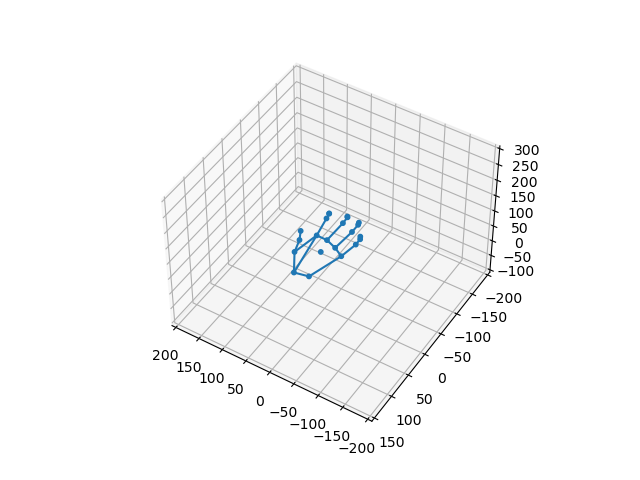

In [14]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

<IPython.core.display.Javascript object>


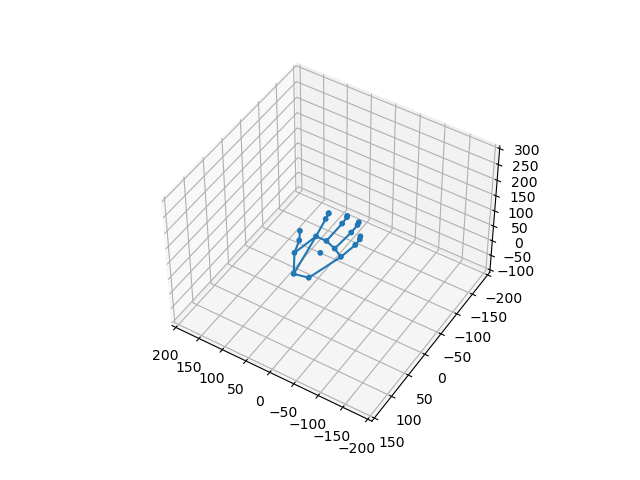

In [15]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    bone_df = row.drop(channel_cols)

    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

# Making a relative hand model

### Feature extraction, making it relative

In [16]:
bone_cols_x = []
bone_cols_y = []
bone_cols_z = []


finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
bone_names = ['MCP', 'PIP', 'DIP', 'TIP']
# We can of course generate column names on the fly:
for finger in finger_names:
    for bone in bone_names:
        bone_cols_x.append(f"{finger}_{bone}_x")
        bone_cols_y.append(f"{finger}_{bone}_y")
        bone_cols_z.append(f"{finger}_{bone}_z")

print(bone_cols_x)

['Thumb_MCP_x', 'Thumb_PIP_x', 'Thumb_DIP_x', 'Thumb_TIP_x', 'Index_MCP_x', 'Index_PIP_x', 'Index_DIP_x', 'Index_TIP_x', 'Middle_MCP_x', 'Middle_PIP_x', 'Middle_DIP_x', 'Middle_TIP_x', 'Ring_MCP_x', 'Ring_PIP_x', 'Ring_DIP_x', 'Ring_TIP_x', 'Pinky_MCP_x', 'Pinky_PIP_x', 'Pinky_DIP_x', 'Pinky_TIP_x']


In [17]:
# Making a relative model based on the wrist
relative_from = 'Palm'

df = data
df[bone_cols_x] = data[bone_cols_x].sub(data[relative_from+'_x'], axis=0)
df[bone_cols_y] = data[bone_cols_y].sub(data[relative_from+'_y'], axis=0)
df[bone_cols_z] = data[bone_cols_z].sub(data[relative_from+'_z'], axis=0)

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

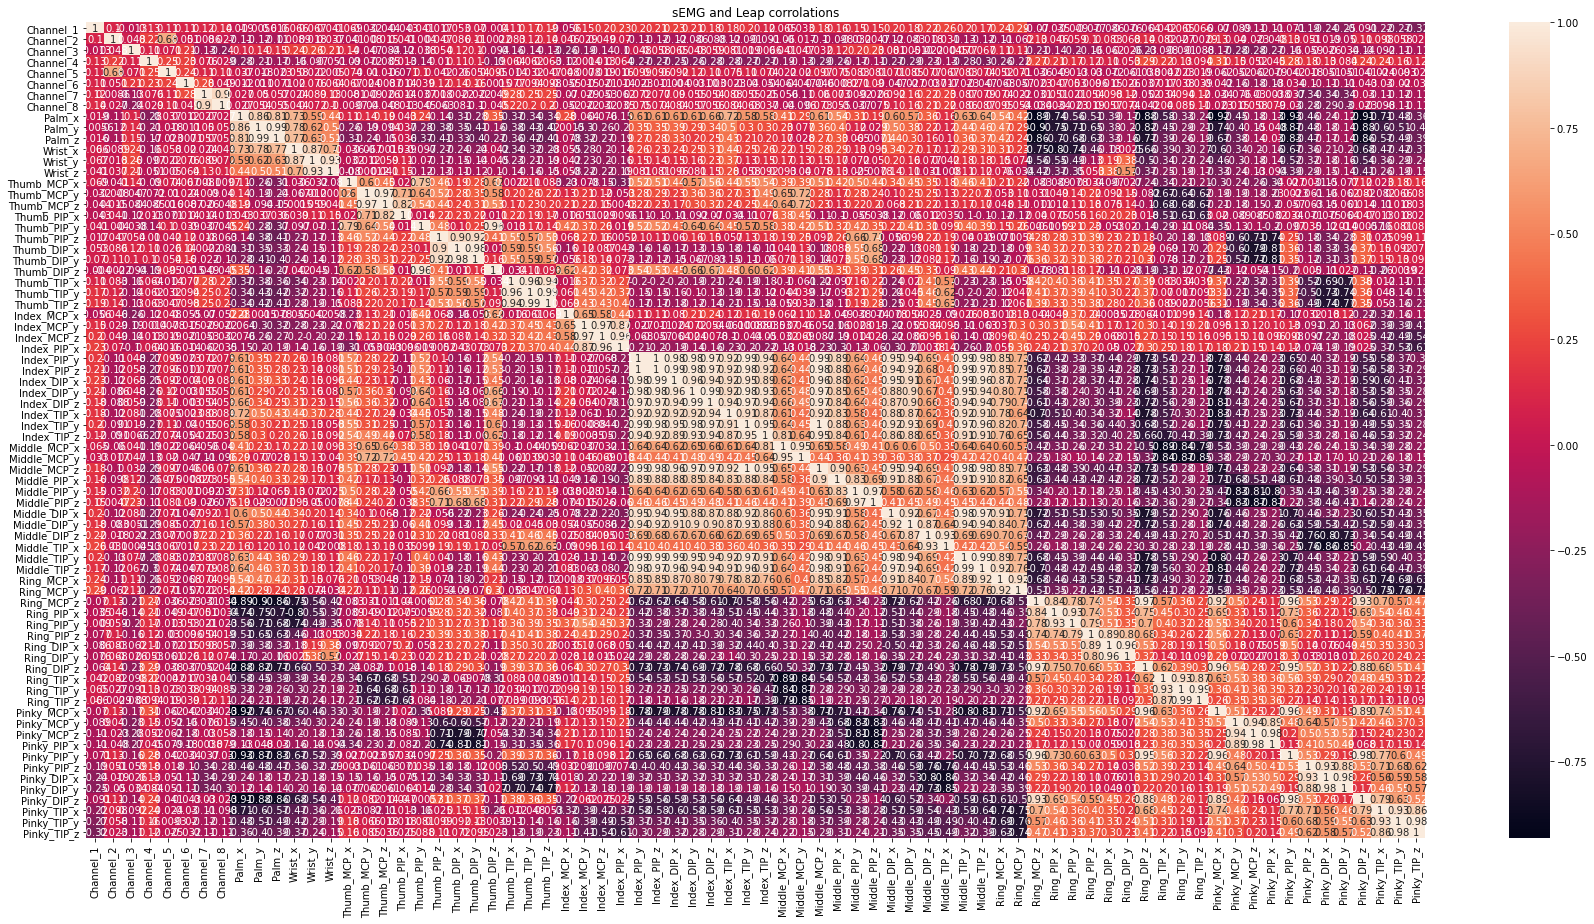

In [18]:
%matplotlib inline

plt.rc('figure', figsize=(30, 15))

sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")

In [19]:
print("Correlation Matrix")
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Correlation Matrix

Top Absolute Correlations
Index_PIP_y   Index_PIP_z     0.996409
Index_TIP_y   Middle_MCP_z    0.995576
Index_DIP_y   Index_DIP_z     0.992956
Index_PIP_z   Index_DIP_x     0.992689
Index_PIP_y   Middle_MCP_z    0.991811
Thumb_TIP_y   Thumb_TIP_z     0.991594
Index_PIP_y   Index_TIP_y     0.990609
              Middle_TIP_y    0.988838
Palm_y        Palm_z          0.988365
Middle_TIP_y  Middle_TIP_z    0.988231
dtype: float64


# Making a full hand baseline

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

y = df[y_cols]
X = df[x_cols]

train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

# Making our benchmark model
# Just predict the mean average number of bikes. 
y_train_mean = train_y.mean()

train_preds = np.ones(train_y.shape) * y_train_mean
preds = np.ones(test_y.shape) * y_train_mean

rmse = np.sqrt(mean_squared_error(train_y, train_preds))
print("Train RMSE: %f" % (rmse))

mae = mean_absolute_error(train_y, train_preds)
print("Train MAE: %f" % (mae))

rmse = np.sqrt(mean_squared_error(test_y, preds))
print("Test RMSE: %f" % (rmse))

mae = mean_absolute_error(test_y, preds)
print("Test MAE: %f" % (mae))

r2_score(test_y, preds)

Train RMSE: 80.372777
Train MAE: 71.349974
Test RMSE: 80.387714
Test MAE: 71.353903


-171.99454152828773

# Making a baseline Neural Network

In [23]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
relative_from_cols = [relative_from+'_x', relative_from+'_y', relative_from+'_z']
relative_from_cols

['Palm_x', 'Palm_y', 'Palm_z']

In [22]:
y_cols = leap_bone_columns
for i in relative_from_cols:
    # Remove non predictors from list
    y_cols.remove(i)

y_cols

['Wrist_x',
 'Wrist_y',
 'Wrist_z',
 'Thumb_MCP_x',
 'Thumb_MCP_y',
 'Thumb_MCP_z',
 'Thumb_PIP_x',
 'Thumb_PIP_y',
 'Thumb_PIP_z',
 'Thumb_DIP_x',
 'Thumb_DIP_y',
 'Thumb_DIP_z',
 'Thumb_TIP_x',
 'Thumb_TIP_y',
 'Thumb_TIP_z',
 'Index_MCP_x',
 'Index_MCP_y',
 'Index_MCP_z',
 'Index_PIP_x',
 'Index_PIP_y',
 'Index_PIP_z',
 'Index_DIP_x',
 'Index_DIP_y',
 'Index_DIP_z',
 'Index_TIP_x',
 'Index_TIP_y',
 'Index_TIP_z',
 'Middle_MCP_x',
 'Middle_MCP_y',
 'Middle_MCP_z',
 'Middle_PIP_x',
 'Middle_PIP_y',
 'Middle_PIP_z',
 'Middle_DIP_x',
 'Middle_DIP_y',
 'Middle_DIP_z',
 'Middle_TIP_x',
 'Middle_TIP_y',
 'Middle_TIP_z',
 'Ring_MCP_x',
 'Ring_MCP_y',
 'Ring_MCP_z',
 'Ring_PIP_x',
 'Ring_PIP_y',
 'Ring_PIP_z',
 'Ring_DIP_x',
 'Ring_DIP_y',
 'Ring_DIP_z',
 'Ring_TIP_x',
 'Ring_TIP_y',
 'Ring_TIP_z',
 'Pinky_MCP_x',
 'Pinky_MCP_y',
 'Pinky_MCP_z',
 'Pinky_PIP_x',
 'Pinky_PIP_y',
 'Pinky_PIP_z',
 'Pinky_DIP_x',
 'Pinky_DIP_y',
 'Pinky_DIP_z',
 'Pinky_TIP_x',
 'Pinky_TIP_y',
 'Pinky_TIP_z']

In [24]:
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

y = df[y_cols]
X = df[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [25]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(63, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mae', optimizer='Adam')
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 63)                16191     
Total params: 84,359
Trainable params: 84,359
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
71/71 [==============================] - 0s 2ms/step - loss: 0.2657 - val_loss: 0.1707
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1702 - val_loss: 0.1691
Epoch 3/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1699 - val_loss: 0.1705
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1696 - val_loss: 0.1691
Epoch 5/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1696 - val_loss: 0.1688
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1690 - val_loss: 0.1687
Epoch 7/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1672 - val_loss: 0.1640
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1578 - val_loss: 0.1583
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1578
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1535 - val_loss: 0.1528
Epoch 11/

71/71 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1406
Epoch 84/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1356 - val_loss: 0.1413
Epoch 85/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1345 - val_loss: 0.1409
Epoch 86/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1353 - val_loss: 0.1402
Epoch 87/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1344 - val_loss: 0.1402
Epoch 88/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1346 - val_loss: 0.1408
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1344 - val_loss: 0.1405
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1345 - val_loss: 0.1407
Epoch 91/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1346 - val_loss: 0.1427
Epoch 92/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1351 - val_loss: 0.1408
Epoch 93/500


71/71 [==============================] - 0s 1ms/step - loss: 0.1277 - val_loss: 0.1377
Epoch 165/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1278 - val_loss: 0.1352
Epoch 166/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1275 - val_loss: 0.1359
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1273 - val_loss: 0.1354
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1285 - val_loss: 0.1354
Epoch 169/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1273 - val_loss: 0.1358
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1275 - val_loss: 0.1358
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1271 - val_loss: 0.1362
Epoch 172/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1277 - val_loss: 0.1354
Epoch 173/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.1354
Epoc

71/71 [==============================] - 0s 1ms/step - loss: 0.1218 - val_loss: 0.1338
Epoch 246/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1235 - val_loss: 0.1338
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1221 - val_loss: 0.1335
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1222 - val_loss: 0.1336
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.1336
Epoch 250/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1224 - val_loss: 0.1329
Epoch 251/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1218 - val_loss: 0.1328
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1215 - val_loss: 0.1323
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1212 - val_loss: 0.1320
Epoch 254/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1217 - val_loss: 0.1334
Epoc

71/71 [==============================] - 0s 1ms/step - loss: 0.1179 - val_loss: 0.1317
Epoch 327/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1175 - val_loss: 0.1340
Epoch 328/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1174 - val_loss: 0.1320
Epoch 329/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1179 - val_loss: 0.1324
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1176 - val_loss: 0.1320
Epoch 331/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1171 - val_loss: 0.1319
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1169 - val_loss: 0.1320
Epoch 333/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1172 - val_loss: 0.1339
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.1320
Epoch 335/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1178 - val_loss: 0.1314
Epoc

71/71 [==============================] - 0s 1ms/step - loss: 0.1127 - val_loss: 0.1316
Epoch 408/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.1307
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1127 - val_loss: 0.1306
Epoch 410/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1132 - val_loss: 0.1307
Epoch 411/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1128 - val_loss: 0.1329
Epoch 412/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1134 - val_loss: 0.1303
Epoch 413/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1126 - val_loss: 0.1304
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1119 - val_loss: 0.1300
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1129 - val_loss: 0.1312
Epoch 416/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1131 - val_loss: 0.1331
Epoc

71/71 [==============================] - 0s 1ms/step - loss: 0.1091 - val_loss: 0.1302
Epoch 489/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1090 - val_loss: 0.1313
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1097 - val_loss: 0.1309
Epoch 491/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1083 - val_loss: 0.1310
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1088 - val_loss: 0.1299
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1086 - val_loss: 0.1291
Epoch 494/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1088 - val_loss: 0.1297
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1083 - val_loss: 0.1301
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1084 - val_loss: 0.1295
Epoch 497/500
71/71 [==============================] - 0s 1ms/step - loss: 0.1088 - val_loss: 0.1315
Epoc

In [27]:
# Evaluate the model on the test data
mae = NN_model.evaluate(test_X, test_y)
mae

24/24 [==============================] - 0s 927us/step - loss: 0.1324


0.13243474066257477

Note that using wrist as the rel_point gives 0.10, which was a lower loss than using the palm

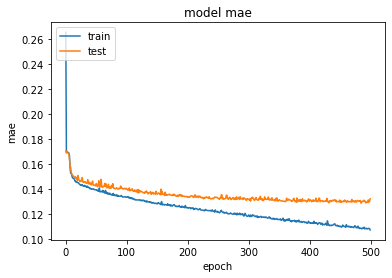

In [28]:
# summarize history for loss
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.54849297 0.6302707  0.7212244  ... 0.6597245  0.6763067  0.68064123]
 [0.33097976 0.52228945 0.6558771  ... 0.89034    0.8517908  0.8136092 ]
 [0.4386229  0.5695512  0.7018269  ... 0.7707052  0.71841776 0.6862585 ]
 ...
 [0.36798114 0.5523096  0.69443434 ... 0.80683124 0.8258487  0.81072706]
 [0.37772366 0.581849   0.6953804  ... 0.75429773 0.82671785 0.81789833]
 [0.5540953  0.6317507  0.72433376 ... 0.5603167  0.56298494 0.5511956 ]]
MSE:  67.72776926788578
RMSE:  8.229688284976884
MAE:  5.000886187139069


In [30]:
prediction = NN_model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[0.6042655  0.67893726 0.7632702  ... 0.55539936 0.6008922  0.6140517 ]
 [0.5589036  0.6218127  0.7213305  ... 0.67552733 0.6978231  0.6954506 ]
 [0.40175688 0.53331196 0.67039365 ... 0.7524836  0.72986996 0.71068823]
 ...
 [0.389689   0.5402826  0.6780549  ... 0.72050345 0.76840985 0.7752995 ]
 [0.3844935  0.5532704  0.72383213 ... 0.6753168  0.5890429  0.582152  ]
 [0.5427723  0.6286153  0.74134254 ... 0.64511645 0.6620544  0.65672606]]
MSE:  89.92581462045933
RMSE:  9.482922261648007
MAE:  6.109719293032556


# Plot the predicted vs ground truth

### Save the model and the scalers

In [31]:
import joblib

model_name = "NNRel-60secs-FULL-MinMaxScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-60secs-FULL-MinMaxScaled-EMG.gz']

In [32]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred

array([[ 21.342457 ,  36.47442  ,  51.463543 ,  21.213848 ,  37.777805 ,
         15.349294 ,  41.682358 ,   8.755171 , -11.646611 ,  19.105873 ,
         33.660652 , -39.524323 , -12.911187 ,   2.3674035, -19.807243 ,
        -33.785995 , -26.914995 , -53.388744 , -28.673965 ,  30.636276 ,
         51.640167 ,  75.56945  ,  41.93048  , -14.844673 ,  -9.794853 ,
         10.466897 , -57.471737 , -55.107582 , -59.528492 , -19.985659 ,
        -41.935658 , -54.671875 , -94.91183  ,   5.6261854, -27.3038   ,
        -77.635056 , -68.57859  ,  17.792698 , -44.229443 , -40.2048   ,
        -46.480507 , 143.93367  , 153.01941  , 160.52779  , 134.28607  ,
        158.45874  , 171.22136  , 160.92094  , 181.10075  , 180.56018  ,
        142.3973   , 176.52795  , 171.61105  , 129.20502  , 138.52126  ,
        174.7197   , 137.28299  , 147.16235  , 145.65846  , 133.40341  ,
        150.71748  , 152.78287  , 117.53664  ]], dtype=float32)

### Relative to absolute predictions again

These relative predictions now need to be made absolute.  
They need an extra position to represent the palm (or what over rel point was used, e.g. wrist)  
They need to be moved back by adding the relative position to all the values in that dimension.   

In [33]:
palm_placeholder = np.array([[0],[0],[0]])

scaled_pred

array([[  19.26892  ,   32.30032  ,   42.97994  ,   20.202824 ,
          34.33505  ,   12.229131 ,   39.713737 ,    8.154146 ,
         -20.199507 ,    7.0208707,   20.87378  ,  -40.062492 ,
         -16.124243 ,   -1.1901166,  -22.170778 ,  -33.187572 ,
         -26.51214  ,  -51.03755  ,  -22.412191 ,   29.829668 ,
          51.159344 ,   76.20087  ,   40.606102 ,  -18.080023 ,
         -15.921841 ,    9.340605 ,  -60.010056 ,  -59.349335 ,
         -63.52787  ,  -21.121056 ,  -45.19433  ,  -63.348392 ,
        -107.21743  ,    4.840215 ,  -28.859703 ,  -80.10837  ,
         -69.46847  ,   16.92519  ,  -45.815315 ,  -40.225357 ,
         -44.531597 ,  146.34995  ,  154.9435   ,  164.55856  ,
         130.35872  ,  148.23958  ,  155.00023  ,  164.28773  ,
         188.91872  ,  192.4697   ,  155.67027  ,  178.42355  ,
         187.10007  ,  150.1746   ,  162.6069   ,  175.87634  ,
         140.31033  ,  150.27225  ,  147.45305  ,  132.62288  ,
         151.62703  ,  153.117    ,  116

In [34]:
# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

scaled_pred = scaled_pred.reshape((3, (NUM_POINTS-3)//3))
pred_points = np.hstack((palm_placeholder, scaled_pred))
pred_points

array([[   0.        ,   19.2689209 ,   32.30031967,   42.97993851,
          20.20282364,   34.33504868,   12.22913074,   39.71373749,
           8.15414619,  -20.19950676,    7.02087069,   20.8737793 ,
         -40.06249237,  -16.12424278,   -1.19011664,  -22.17077827,
         -33.18757248,  -26.51214027,  -51.03755188,  -22.41219139,
          29.82966805,   51.15934372],
       [   0.        ,   76.2008667 ,   40.60610199,  -18.08002281,
         -15.92184067,    9.34060478,  -60.01005554,  -59.34933472,
         -63.52787018,  -21.1210556 ,  -45.19432831,  -63.34839249,
        -107.21743011,    4.84021521,  -28.85970306,  -80.10836792,
         -69.46846771,   16.92518997,  -45.81531525,  -40.22535706,
         -44.53159714,  146.34994507],
       [   0.        ,  154.9434967 ,  164.55856323,  130.35871887,
         148.23957825,  155.00022888,  164.28773499,  188.91871643,
         192.46969604,  155.67027283,  178.42355347,  187.10006714,
         150.17460632,  162.60690308, 

When Scaling it back, we need to make sure they go in the right points.
If we are using the palm, they will be the first, but if the wrist then it will be the second. 

In [35]:
if (relative_from == 'Palm'):
    print("Carry on")
else:
    print("You are trying to make a model using the wrist or another point")
    print("You can not predict using this method as it assumes the first row in the points array is relative from")
    # Putting this here so you cant forget
    quit()

Carry on


Now we must add the position of the relative points to all other points

In [36]:
# Replace this point with whatever you want the palm to be
rel_point = np.array([
    [12],
    [12],
    [12]])

pred_points

array([[   0.        ,   19.2689209 ,   32.30031967,   42.97993851,
          20.20282364,   34.33504868,   12.22913074,   39.71373749,
           8.15414619,  -20.19950676,    7.02087069,   20.8737793 ,
         -40.06249237,  -16.12424278,   -1.19011664,  -22.17077827,
         -33.18757248,  -26.51214027,  -51.03755188,  -22.41219139,
          29.82966805,   51.15934372],
       [   0.        ,   76.2008667 ,   40.60610199,  -18.08002281,
         -15.92184067,    9.34060478,  -60.01005554,  -59.34933472,
         -63.52787018,  -21.1210556 ,  -45.19432831,  -63.34839249,
        -107.21743011,    4.84021521,  -28.85970306,  -80.10836792,
         -69.46846771,   16.92518997,  -45.81531525,  -40.22535706,
         -44.53159714,  146.34994507],
       [   0.        ,  154.9434967 ,  164.55856323,  130.35871887,
         148.23957825,  155.00022888,  164.28773499,  188.91871643,
         192.46969604,  155.67027283,  178.42355347,  187.10006714,
         150.17460632,  162.60690308, 

In [37]:
pred_points = pred_points + rel_point
pred_points

array([[ 12.        ,  31.2689209 ,  44.30031967,  54.97993851,
         32.20282364,  46.33504868,  24.22913074,  51.71373749,
         20.15414619,  -8.19950676,  19.02087069,  32.8737793 ,
        -28.06249237,  -4.12424278,  10.80988336, -10.17077827,
        -21.18757248, -14.51214027, -39.03755188, -10.41219139,
         41.82966805,  63.15934372],
       [ 12.        ,  88.2008667 ,  52.60610199,  -6.08002281,
         -3.92184067,  21.34060478, -48.01005554, -47.34933472,
        -51.52787018,  -9.1210556 , -33.19432831, -51.34839249,
        -95.21743011,  16.84021521, -16.85970306, -68.10836792,
        -57.46846771,  28.92518997, -33.81531525, -28.22535706,
        -32.53159714, 158.34994507],
       [ 12.        , 166.9434967 , 176.55856323, 142.35871887,
        160.23957825, 167.00022888, 176.28773499, 200.91871643,
        204.46969604, 167.67027283, 190.42355347, 199.10006714,
        162.17460632, 174.60690308, 187.87634277, 152.31033325,
        162.27224731, 159.4530

In [38]:
df[x_cols].iloc[0].values

array([ 38, 269, 111,  47, 101,  35,  22,  23])

In [39]:
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 38, 269, 111,  47, 101,  35,  22,  23]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred

# Add back palm points
palm_placeholder = np.array([
    [0],
    [0],
    [0]])
# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

# Change the shape by adding a new point on
scaled_pred = scaled_pred.reshape((3, (NUM_POINTS-3)//3))
pred_points = np.hstack((palm_placeholder, scaled_pred))
pred_points

# Add the position of rel, to move everything back
# Replace this point with whatever you want the palm to be
rel_point = np.array([
    [12],
    [12],
    [12]])
pred_points = pred_points + rel_point
pred_points


array([[ 12.        ,  41.12334442,  52.61621094,  64.69387817,
         32.95721626,  49.64922333,  29.96645164,  54.57469559,
         22.41806221,  -3.07199669,  24.1887064 ,  40.36832809,
        -23.34126663,  -6.74532509,   6.76961565, -14.0033493 ,
        -19.88903618, -19.04197693, -46.5336113 , -23.31838608,
         61.75147247,  81.86151886],
       [ 12.        , 104.03771973,  74.6102066 ,  18.14020777,
         19.55691099,  41.94256401, -25.01725769, -26.21452332,
        -27.78385925,  12.70081335, -11.628582  , -25.47307587,
        -63.09931946,  35.84040642,   5.11666489, -46.61310196,
        -39.8276329 ,  49.49774933,  -9.92583656,  -8.56361008,
        -12.81337547, 141.14360046],
       [ 12.        , 149.30224609, 158.89471436, 132.50753784,
        147.05787659, 158.01092529, 156.89077759, 173.6260376 ,
        175.02391052, 138.18614197, 170.09335327, 172.33633423,
        131.39133453, 137.30164337, 171.65562439, 141.42979431,
        150.99757385, 147.8880

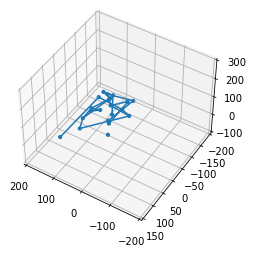

In [40]:
# Plotting pred points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(pred_points, patches)
plot_bone_lines(pred_points, ax)

## RNN

LSTM layer is a recurrent layer, hence it expects a 3-dimensional input (batch_size, timesteps, input_dim).

For some reason, using LSTMs gave me a: CuDNNLSTM: UnknownError: Fail to find the dnn implementation.
Which was solved enabling memory growth with:
```
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
```
Found on stackoverflow [here](https://stackoverflow.com/questions/54473254/cudnnlstm-unknownerror-fail-to-find-the-dnn-implementation).

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM

In [42]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

NameError: name 'df_rel' is not defined

In [43]:
def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X)

In [16]:
Xs.shape

(2988, 32)

In [17]:
rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]
timesteps = 2

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

In [18]:
ny.shape, nX.shape

((2988, 3), (2988, 16, 2))

In [19]:
ny

array([[0.49306208, 0.28899089, 0.1240378 ],
       [0.49770498, 0.2952168 , 0.1187368 ],
       [0.5090705 , 0.30494976, 0.11952207],
       ...,
       [0.51438224, 0.16568474, 0.438331  ],
       [0.569526  , 0.21435243, 0.4916916 ],
       [0.6128559 , 0.26195723, 0.5435817 ]], dtype=float32)

In [20]:
rel_hand_scaler.transform(y)

array([[0.49246495, 0.28045072, 0.14176991],
       [0.49306208, 0.2889909 , 0.12403781],
       [0.49770497, 0.29521679, 0.1187368 ],
       ...,
       [0.51438223, 0.16568475, 0.43833102],
       [0.569526  , 0.21435242, 0.49169159],
       [0.61285593, 0.26195722, 0.5435817 ]])

In [21]:
y.head()

Thumb_r_tip_x  Thumb_r_tip_y  Thumb_r_tip_z
0      51.706015     -25.778099     -31.954857
1      51.751778     -25.371140     -33.126869
2      52.107599     -25.074463     -33.477242
3      52.978632     -24.610666     -33.425339
4      54.664660     -24.000892     -32.757812

In [23]:
Xs

Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
1          37.0       97.0      243.0      260.0       86.0       53.0   
2          37.0      102.0      243.0      265.0       90.0       54.0   
3          33.0       88.0      223.0      252.0       90.0       54.0   
4          33.0       92.0      219.0      231.0       90.0       57.0   
5          35.0      108.0      255.0      228.0       93.0       63.0   
...         ...        ...        ...        ...        ...        ...   
2984       33.0      111.0      225.0      197.0       73.0       91.0   
2985       27.0      130.0      226.0      221.0       84.0       96.0   
2986       30.0      135.0      227.0      224.0      103.0      104.0   
2987       31.0      128.0      231.0      237.0      105.0      110.0   
2988       39.0      122.0      198.0      194.0      100.0      103.0   

      Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_7_p1  \
1          55.0       26.0       40.0       184.0  ...          59.0   
2          46.0       25.0       43.0       193.0  ...          55.0   
3          47.0       25.0       41.0       198.0  ...          46.0   
4          53.0       26.0       43.0       196.0  ...          47.0   
5          55.0       29.0       44.0       214.0  ...          53.0   
...         ...        ...        ...         ...  ...           ...   
2984      122.0       58.0       48.0       116.0  ...         124.0   
2985      116.0       34.0       52.0       123.0  ...         122.0   
2986      142.0       36.0       56.0       129.0  ...         116.0   
2987      147.0       31.0       56.0       140.0  ...         142.0   
2988      130.0       27.0       55.0       135.0  ...         147.0   

      Channel_8_p1  Channel_9_p1  Channel_10_p1  Channel_11_p1  Channel_12_p1  \
1             23.0          41.0          147.0          199.0          226.0   
2             26.0          40.0          184.0          201.0          226.0   
3             25.0          43.0          193.0          192.0          210.0   
4             25.0          41.0          198.0          212.0          165.0   
5             26.0          43.0          196.0          210.0          151.0   
...            ...           ...            ...            ...            ...   
2984          67.0          37.0           96.0          209.0           98.0   
2985          58.0          48.0          116.0          218.0           98.0   
2986          34.0          52.0          123.0          213.0          136.0   
2987          36.0          56.0          129.0          208.0          143.0   
2988          31.0          56.0          140.0          215.0          159.0   

      Channel_13_p1  Channel_14_p1  Channel_15_p1  Channel_16_p1  
1             111.0           48.0           23.0           22.0  
2             111.0           48.0           22.0           20.0  
3             106.0           49.0           25.0           20.0  
4              94.0           45.0           28.0           25.0  
5              80.0           42.0           31.0           26.0  
...             ...            ...            ...            ...  
2984           45.0           34.0           22.0           20.0  
2985           49.0           34.0           24.0           24.0  
2986           89.0           42.0           28.0           23.0  
2987          101.0           42.0           29.0           25.0  
2988          104.0           44.0           30.0           27.0  

[2988 rows x 32 columns]

In [24]:
df_rel.head()

Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0         38         88        252        257         81         50   
1         37         97        243        260         86         53   
2         37        102        243        265         90         54   
3         33         88        223        252         90         54   
4         33         92        219        231         90         57   

   Channel_7  Channel_8  Channel_9  Channel_10  Channel_11  Channel_12  \
0         59         23         41         147         199         226   
1         55         26         40         184         201         226   
2         46         25         43         193         192         210   
3         47         25         41         198         212         165   
4         53         26         43         196         210         151   

   Channel_13  Channel_14  Channel_15  Channel_16  Thumb_r_tip_x  \
0         111          48          23          22      51.706015   
1         111          48          22          20      51.751778   
2         106          49          25          20      52.107599   
3          94          45          28          25      52.978632   
4          80          42          31          26      54.664660   

   Thumb_r_tip_y  Thumb_r_tip_z  
0     -25.778099     -31.954857  
1     -25.371140     -33.126869  
2     -25.074463     -33.477242  
3     -24.610666     -33.425339  
4     -24.000892     -32.757812

In [25]:
train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [26]:
train_X.shape, train_y.shape

((2488, 16, 2), (2488, 3))

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import LSTM

In [28]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))

model.compile(loss='mae', optimizer='adam')

In [29]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
35/35 - 0s - loss: 0.2476 - val_loss: 0.1735
Epoch 2/50
35/35 - 0s - loss: 0.1833 - val_loss: 0.1496
Epoch 3/50
35/35 - 0s - loss: 0.1666 - val_loss: 0.1463
Epoch 4/50
35/35 - 0s - loss: 0.1612 - val_loss: 0.1457
Epoch 5/50
35/35 - 0s - loss: 0.1587 - val_loss: 0.1458
Epoch 6/50
35/35 - 0s - loss: 0.1569 - val_loss: 0.1461
Epoch 7/50
35/35 - 0s - loss: 0.1556 - val_loss: 0.1461
Epoch 8/50
35/35 - 0s - loss: 0.1551 - val_loss: 0.1462
Epoch 9/50
35/35 - 0s - loss: 0.1548 - val_loss: 0.1464
Epoch 10/50
35/35 - 0s - loss: 0.1541 - val_loss: 0.1465
Epoch 11/50
35/35 - 0s - loss: 0.1537 - val_loss: 0.1466
Epoch 12/50
35/35 - 0s - loss: 0.1533 - val_loss: 0.1465
Epoch 13/50
35/35 - 0s - loss: 0.1531 - val_loss: 0.1466
Epoch 14/50
35/35 - 0s - loss: 0.1529 - val_loss: 0.1466
Epoch 15/50
35/35 - 0s - loss: 0.1527 - val_loss: 0.1467
Epoch 16/50
35/35 - 0s - loss: 0.1525 - val_loss: 0.1467
Epoch 17/50
35/35 - 0s - loss: 0.1523 - val_loss: 0.1467
Epoch 18/50
35/35 - 0s - loss: 0.1521 - 

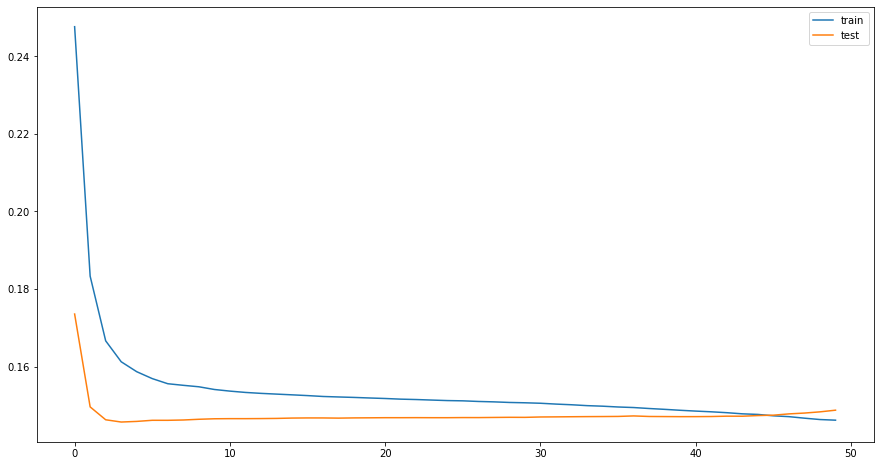

In [30]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [31]:
mea = model.evaluate(test_X, test_y)
mea

16/16 [==============================] - 0s 1ms/step - loss: 0.1487


0.14873537421226501

# Non Trivial RNN Arc

In [30]:
model = Sequential()
# 8 Features and 2 timesteps
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam', metrics=['mse','mae'])
model.summary()

NameError: name 'LSTM' is not defined

In [33]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=False)

Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 0.2448 - val_loss: 0.1864
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1752 - val_loss: 0.1654
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1730 - val_loss: 0.1580
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1746 - val_loss: 0.1506
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1689 - val_loss: 0.1470
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1642 - val_loss: 0.1470
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1608 - val_loss: 0.1476
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1589 - val_loss: 0.1480
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1576 - val_loss: 0.1479
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1574 - val_loss: 0.1482
Epoch 11/50
35/35 

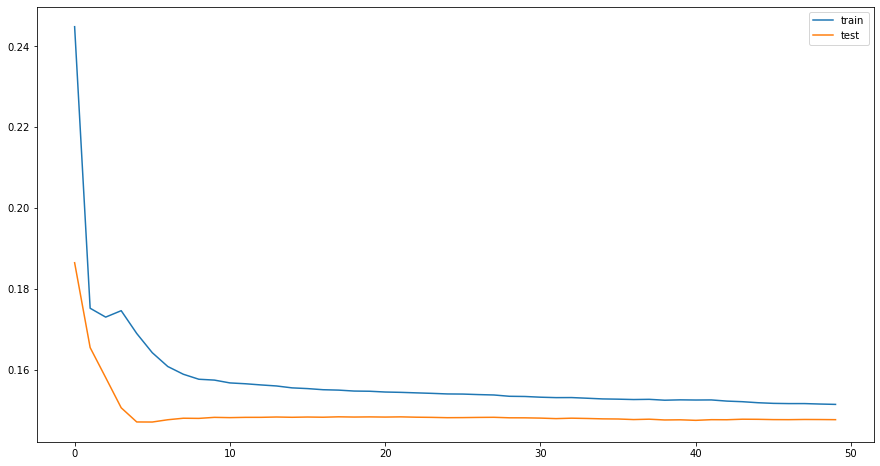

In [34]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

MAE still performs better as a loss than MSE

Results of minimising MSE loss

In [35]:
# summarize history for loss
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'mae'

## Longer Timesequence RNN

In [49]:
timesteps = 20

y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X, timesteps)

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [50]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 16, 64)            21760     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                

In [51]:
# fit network, with 16 channels
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 15ms/step - loss: 0.2064 - val_loss: 0.1388
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1605 - val_loss: 0.1331
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1528 - val_loss: 0.1295
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1436 - val_loss: 0.1327
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1399 - val_loss: 0.1326
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1357 - val_loss: 0.1316
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1321 - val_loss: 0.1346
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1268 - val_loss: 0.1289
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1229 - val_loss: 0.1245
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1207 - val_loss: 0.1242
Epoch 11/50
35/35 

In [39]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 0s 14ms/step - loss: 0.2193 - val_loss: 0.1463
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1625 - val_loss: 0.1437
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1510 - val_loss: 0.1388
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1445 - val_loss: 0.1443
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1432 - val_loss: 0.1375
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1360 - val_loss: 0.1367
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1328 - val_loss: 0.1383
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1306 - val_loss: 0.1388
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1288 - val_loss: 0.1423
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1263 - val_loss: 0.1467
Epoch 11/50
35/35 

16/16 [==============================] - 0s 2ms/step - loss: 0.1208


0.12083747237920761

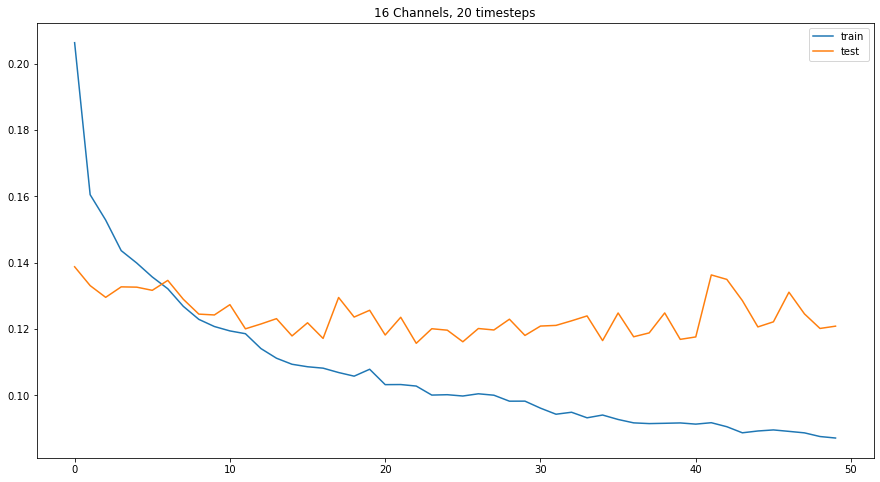

In [52]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("16 Channels, 20 timesteps")
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


16/16 [==============================] - 0s 2ms/step - loss: 0.1307


0.13074730336666107

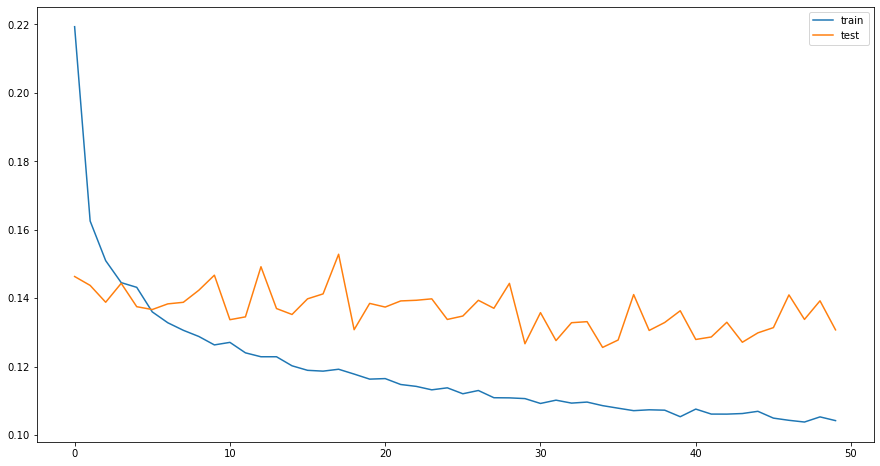

In [40]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [41]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 8, 256)            283648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 8, 256)            525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [42]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 21ms/step - loss: 0.3883 - val_loss: 0.1718
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1729 - val_loss: 0.1626
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1508 - val_loss: 0.1600
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1410 - val_loss: 0.1576
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1409 - val_loss: 0.1552
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1394 - val_loss: 0.1573
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1395 - val_loss: 0.1586
Epoch 8/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1341 - val_loss: 0.1595
Epoch 9/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1333 - val_loss: 0.1521
Epoch 10/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1314 - val_loss: 0.1526
Epoch 11/50
35/35 

16/16 [==============================] - 0s 3ms/step - loss: 0.1596


0.1595798134803772

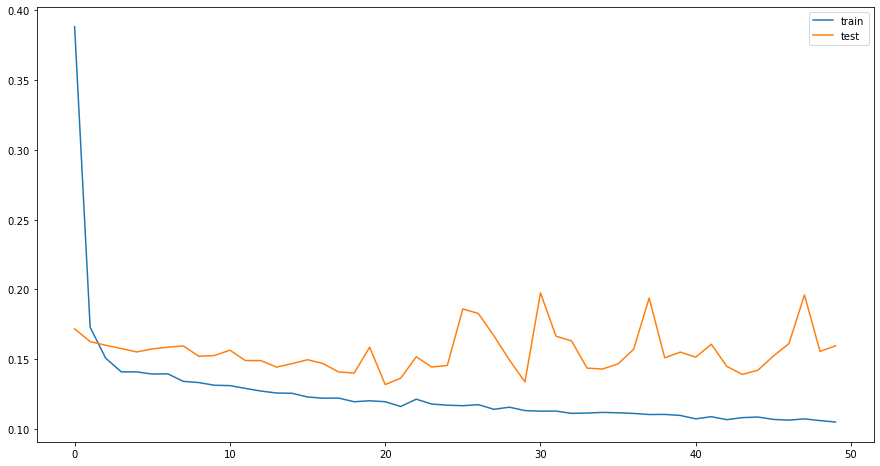

In [43]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


In [44]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 8, 256)            283648    
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 8, 256)            525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 256)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

In [45]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Epoch 1/50
35/35 [==============================] - 1s 23ms/step - loss: 0.6679 - val_loss: 0.1573
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.2536 - val_loss: 0.1566
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1708 - val_loss: 0.1563
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1527 - val_loss: 0.1566
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1436 - val_loss: 0.1580
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1387 - val_loss: 0.1598
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1368 - val_loss: 0.1608
Epoch 8/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1390 - val_loss: 0.1597
Epoch 9/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1359 - val_loss: 0.1616
Epoch 10/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1340 - val_loss: 0.1504
Epoch 11/50
35/35 

16/16 [==============================] - 0s 3ms/step - loss: 0.1389


0.1388637125492096

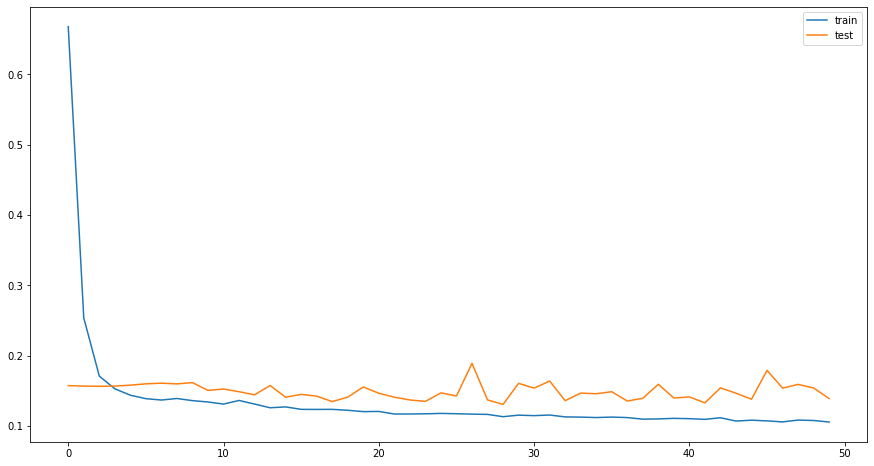

In [46]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

mea = model.evaluate(test_X, test_y)
mea


# Is my model even learning anything?

In [54]:
df_rel[x_cols].var()

Channel_2    1047.795142
Channel_3    1583.356274
Channel_4    1396.340594
dtype: float64

In [55]:
timesteps = 20

y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_2', 'Channel_3', 'Channel_4']

y = df_rel[y_cols]
X = df_rel[x_cols]

def gen_seqs(X, timesteps=2):
    sX = X.astype('float32')
    for col_name in X:
        for t in range(1,timesteps):
            # Add the past col name
            sX[col_name+"_p"+str(t)] = X[col_name].shift(t)
    # Drop NaNs
    sX.dropna(inplace=True)
    return sX

Xs = gen_seqs(X, timesteps)

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(Xs)

# Ensure all data is a 32bit
nX = nX.astype('float32')
ny = ny.astype('float32')

# Reshape Scaled X
features = X.shape[1]
observations = Xs.shape[0]

nX = nX.reshape(observations, features, timesteps)

# Delete the labels, we no longer have data for
ny = ny[timesteps-1:]

train_X = nX[500:,:]
test_X = nX[:500,:]

train_y = ny[500:,:] # Train on the last 11466
test_y = ny[:500,:] # Test on the last 500

In [56]:
model = Sequential()
# 8 Features and 20 timesteps
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(14))
model.add(Dense(3))

model.compile(loss='mae', optimizer='Adam')
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=True)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 3, 256)            283648    
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 256)            525312    
_________________________________________________________________
dropout_13 (Dropout)         (None, 3, 256)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)              

# Considering more data for a fully connected architecture


In [61]:
df1 = pd.read_csv("../data/dual_thumb_emg_20.csv")
df2 = pd.read_csv("../data/dual_thumb_emg_60.csv")
df3 = pd.read_csv("../data/dual_thumb_emg_90.csv")

big_df = df1.append(df2).append(df3)

In [65]:
big_df = big_df.dropna()

In [66]:
big_df.describe()

Channel_1    Channel_2    Channel_3    Channel_4    Channel_5  \
count  8473.000000  8473.000000  8473.000000  8473.000000  8473.000000   
mean     32.369055    82.711318   152.872064   142.944884    58.171368   
std       7.596009    28.862459    39.947078    37.887920    11.319597   
min      16.000000    27.000000    48.000000    45.000000    27.000000   
25%      28.000000    66.000000   126.000000   119.000000    51.000000   
50%      31.000000    80.000000   149.000000   140.000000    58.000000   
75%      35.000000    94.000000   174.000000   164.000000    65.000000   
max     108.000000   369.000000   416.000000   402.000000   133.000000   

         Channel_6    Channel_7    Channel_8    Channel_9   Channel_10  ...  \
count  8473.000000  8473.000000  8473.000000  8473.000000  8473.000000  ...   
mean     61.557064    83.635076    28.155199    36.456391   105.125811  ...   
std      13.057107    22.783912     9.565026     7.796985    38.313062  ...   
min      27.000000    19.000000    17.000000    21.000000    38.000000  ...   
25%      53.000000    68.000000    25.000000    31.000000    79.000000  ...   
50%      60.000000    80.000000    27.000000    35.000000    97.000000  ...   
75%      68.000000    97.000000    29.000000    40.000000   122.000000  ...   
max     162.000000   246.000000   234.000000   127.000000   439.000000  ...   

       Index_tip_y  Middle_tip_y   Ring_tip_y  Pinky_tip_y   Palm_tip_z  \
count  8473.000000   8473.000000  8473.000000  8473.000000  8473.000000   
mean    -68.963017    -77.358727   -70.706500   -52.895699   141.703711   
std      13.661742     14.180815    13.370414    12.398840    12.512466   
min     -91.182396   -101.395004   -93.281807   -74.881454   106.961754   
25%     -81.473190    -89.208702   -82.454391   -64.038139   134.182968   
50%     -71.869713    -81.291908   -73.561447   -54.555096   140.474823   
75%     -58.144440    -65.804260   -61.850285   -45.695801   150.134415   
max     -36.672607    -47.621513   -42.139599   -23.060318   172.289871   

       Thumb_tip_z  Index_tip_z  Middle_tip_z   Ring_tip_z  Pinky_tip_z  
count  8473.000000  8473.000000   8473.000000  8473.000000  8473.000000  
mean    124.660918   140.959821    126.019362   116.783797   111.061251  
std      19.071209    13.329667     14.717593    13.951317    14.385735  
min      78.297310   107.145988     88.627296    80.711517    74.671944  
25%     110.682755   132.559189    116.000778   108.173355   101.966080  
50%     121.957825   139.103729    124.454781   115.710762   110.995247  
75%     136.279770   146.262527    132.964386   123.833229   118.194801  
max     180.504608   175.812469    163.695572   151.784973   148.608871  

[8 rows x 34 columns]

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

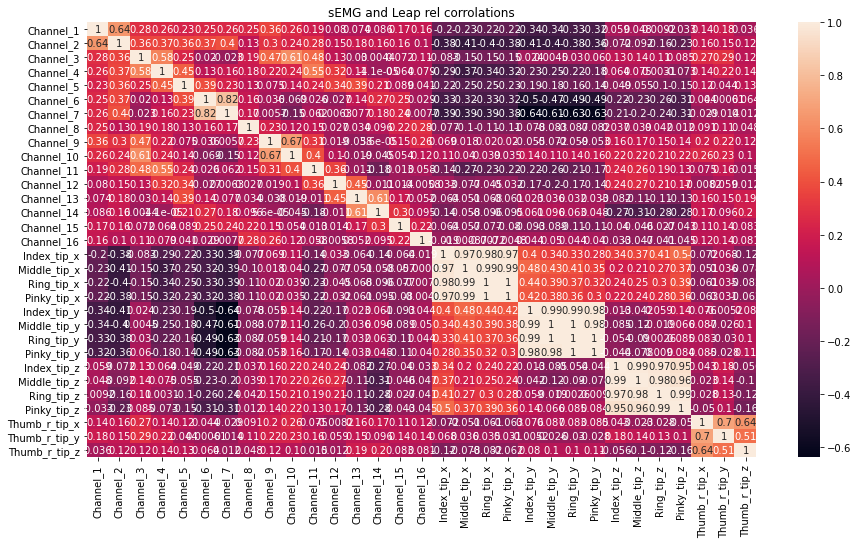

In [67]:
df_rel = big_df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

drop_cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df_rel = df_rel.drop(drop_cols,1)
sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

In [68]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16',]

y = df_rel[y_cols]
X = df_rel[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [69]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mae', optimizer='Adam')
NN_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 771       
Total params: 69,003
Trainable params: 69,003
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1560 - val_loss: 0.1501
Epoch 2/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1467 - val_loss: 0.1461
Epoch 3/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1418
Epoch 4/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 0.1403
Epoch 5/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1401 - val_loss: 0.1395
Epoch 6/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1401
Epoch 7/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1392
Epoch 8/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1390 - val_loss: 0.1395
Epoch 9/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.1381
Epoch 10/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1383 - val_lo

Epoch 161/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1205 - val_loss: 0.1285
Epoch 162/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1207 - val_loss: 0.1278
Epoch 163/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1205 - val_loss: 0.1278
Epoch 164/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1203 - val_loss: 0.1284
Epoch 165/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.1275
Epoch 166/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.1278
Epoch 167/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.1272
Epoch 168/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1198 - val_loss: 0.1277
Epoch 169/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1199 - val_loss: 0.1274
Epoch 170/500
199/199 [==============================] - 0s 2ms/step - lo

199/199 [==============================] - 0s 2ms/step - loss: 0.1107 - val_loss: 0.1269
Epoch 320/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.1261
Epoch 321/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1101 - val_loss: 0.1264
Epoch 322/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.1259
Epoch 323/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1100 - val_loss: 0.1256
Epoch 324/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1259
Epoch 325/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1099 - val_loss: 0.1260
Epoch 326/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1099 - val_loss: 0.1262
Epoch 327/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1091 - val_loss: 0.1262
Epoch 328/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1095 - v

199/199 [==============================] - 0s 2ms/step - loss: 0.1010 - val_loss: 0.1277
Epoch 478/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1011 - val_loss: 0.1275
Epoch 479/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1010 - val_loss: 0.1270
Epoch 480/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1017 - val_loss: 0.1268
Epoch 481/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.1271
Epoch 482/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.1284
Epoch 483/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1012 - val_loss: 0.1284
Epoch 484/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1012 - val_loss: 0.1273
Epoch 485/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1013 - val_loss: 0.1274
Epoch 486/500
199/199 [==============================] - 0s 2ms/step - loss: 0.1014 - v

In [72]:
# Evaluate the model on the test data
mae = NN_model.evaluate(test_X, test_y)
mae

67/67 [==============================] - 0s 744us/step - loss: 0.1282


0.12824894487857819

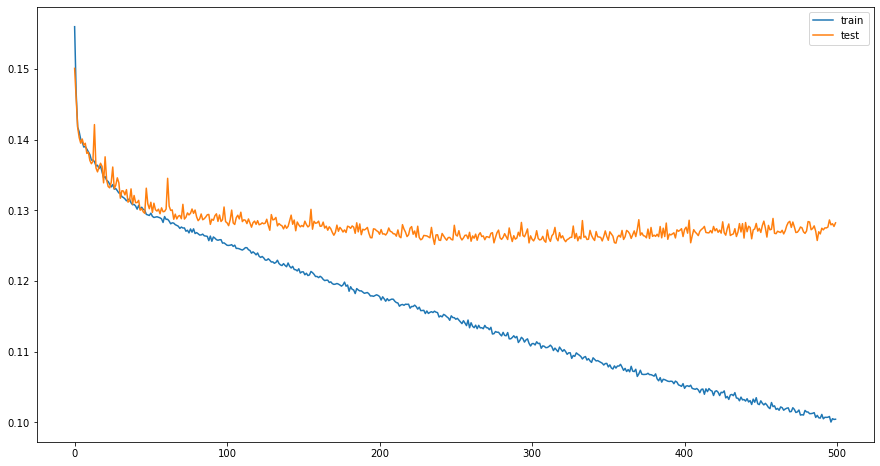

In [73]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [74]:
model = Sequential()

# The Input Layer :
model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(14 ,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))

# The Output Layer :
model.add(Dense(3, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mae', optimizer='Adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_26 (Dense)             (None, 256)               2304      
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_28 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_29 (Dense)             (None, 32)               

In [75]:
history = model.fit(train_X, train_y, epochs=500, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/500
199/199 [==============================] - 1s 4ms/step - loss: 0.1560 - val_loss: 0.1804
Epoch 2/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1449 - val_loss: 0.1598
Epoch 3/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1424 - val_loss: 0.1491
Epoch 4/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1423 - val_loss: 0.1434
Epoch 5/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1409 - val_loss: 0.1390
Epoch 6/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1406 - val_loss: 0.1404
Epoch 7/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1387 - val_loss: 0.1406
Epoch 8/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1382 - val_loss: 0.1362
Epoch 9/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1377 - val_loss: 0.1393
Epoch 10/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1371 - val_lo

Epoch 161/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1288 - val_loss: 0.1305
Epoch 162/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1294 - val_loss: 0.1300
Epoch 163/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1289 - val_loss: 0.1306
Epoch 164/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1288 - val_loss: 0.1314
Epoch 165/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1293 - val_loss: 0.1371
Epoch 166/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1290 - val_loss: 0.1315
Epoch 167/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1292 - val_loss: 0.1330
Epoch 168/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1298 - val_loss: 0.1304
Epoch 169/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1291 - val_loss: 0.1296
Epoch 170/500
199/199 [==============================] - 1s 3ms/step - lo

199/199 [==============================] - 1s 3ms/step - loss: 0.1283 - val_loss: 0.1300
Epoch 320/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1318
Epoch 321/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1281 - val_loss: 0.1302
Epoch 322/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1276 - val_loss: 0.1290
Epoch 323/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1271 - val_loss: 0.1295
Epoch 324/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.1306
Epoch 325/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1275 - val_loss: 0.1367
Epoch 326/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1318
Epoch 327/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1305
Epoch 328/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1279 - v

199/199 [==============================] - 1s 3ms/step - loss: 0.1267 - val_loss: 0.1336
Epoch 478/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1277 - val_loss: 0.1317
Epoch 479/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1268 - val_loss: 0.1294
Epoch 480/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1267 - val_loss: 0.1298
Epoch 481/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1269 - val_loss: 0.1302
Epoch 482/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1269 - val_loss: 0.1309
Epoch 483/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1268 - val_loss: 0.1296
Epoch 484/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1268 - val_loss: 0.1310
Epoch 485/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1295
Epoch 486/500
199/199 [==============================] - 1s 3ms/step - loss: 0.1269 - v